In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
bandWidth = 10e6
chirpDuration = 20e-6
EchoDuration = 10e-6 + chirpDuration

samplingFrequency = 2.5 * bandWidth

velocity = 20
antennaLength = 0.5

dopplerBandwidth = 2* velocity / antennaLength
syntheticLength = 100
integrationTime = syntheticLength/velocity

prf = int(np.floor(2.5*dopplerBandwidth))



In [82]:
sensingTime = integrationTime
numEchoes = int(np.floor(sensingTime*prf))

In [83]:
numSamPulse = int(np.floor(samplingFrequency*chirpDuration))
chirpTime = np.linspace(0,chirpDuration,numSamPulse)
numSampleEcho = int(np.floor(samplingFrequency*EchoDuration))

numIntegrationEcho = int(np.floor(integrationTime*prf))

In [84]:
numSamPulse

500

In [85]:
dopplerTime = np.linspace(-integrationTime/2,integrationTime/2,numIntegrationEcho)
dopplerPulse = np.exp(1j*np.pi*(dopplerBandwidth/integrationTime)*dopplerTime**2)

In [86]:
sig = np.zeros((numEchoes,numSampleEcho))

In [87]:
for i in range(numEchoes):
    sig[i,200:numSamPulse + 200] =  np.exp(1j*np.pi*(bandWidth/chirpDuration)*chirpTime**2 +
                                           (dopplerBandwidth/integrationTime)*dopplerTime[i]**2)

C:\Users\Vivek Rakshit\AppData\Local\Temp\ipykernel_5972\2642493897.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  sig[i,200:numSamPulse + 200] =  np.exp(1j*np.pi*(bandWidth/chirpDuration)*chirpTime**2 +


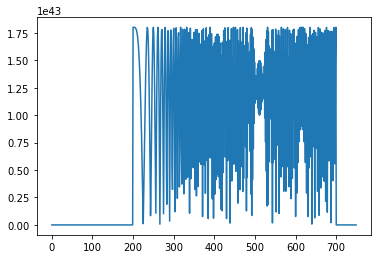

In [92]:
plt.plot(np.abs(sig[1,:]))

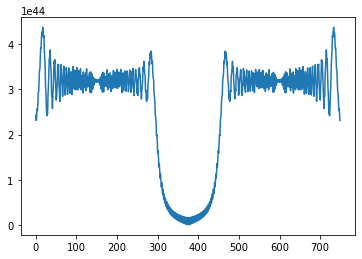

In [93]:
plt.plot(np.abs(np.fft.fft(sig[1,:])))

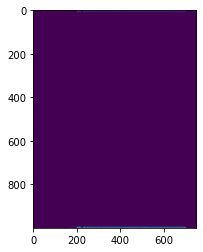

In [94]:
plt.imshow(np.abs(sig))

In [95]:
refSigRange = np.zeros(numSampleEcho)
refSigRange[-1-numSamPulse:-1] = np.exp(1j*np.pi*(bandWidth/chirpDuration)*np.flipud(chirpTime)**2)

C:\Users\Vivek Rakshit\AppData\Local\Temp\ipykernel_5972\1311958137.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  refSigRange[-1-numSamPulse:-1] = np.exp(1j*np.pi*(bandWidth/chirpDuration)*np.flipud(chirpTime)**2)


In [96]:
rangeCompressedSig = np.zeros((numEchoes, numSampleEcho))

In [97]:
for p in range(numEchoes):
    rangeCompressedSig[p,:] = np.fft.ifft(np.fft.fft(sig[p,:])*np.fft.fft(np.conj(refSigRange)))
    

C:\Users\Vivek Rakshit\AppData\Local\Temp\ipykernel_5972\567160489.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  rangeCompressedSig[p,:] = np.fft.ifft(np.fft.fft(sig[p,:])*np.fft.fft(np.conj(refSigRange)))


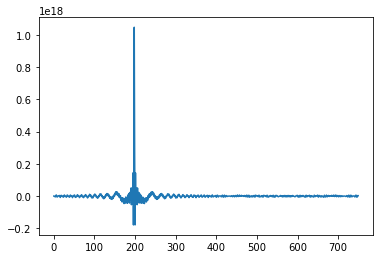

In [98]:
plt.plot(rangeCompressedSig[200,:])

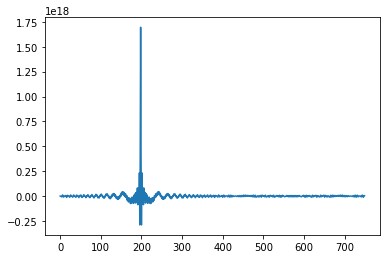

In [104]:
plt.plot(rangeCompressedSig[198,:])
refSigAzimuth = np.zeros(numEchoes)
refSigAzimuth = dopplerPulse


In [100]:
azimuthCompressedSig = np.zeros((numEchoes, numSampleEcho))
for t in range(numSampleEcho):
    azimuthCompressedSig[:,t] = np.fft.fftshift(np.fft.ifft(np.fft.fft(rangeCompressedSig[:,t])*np.fft.fft(np.conj(refSigAzimuth))))

C:\Users\Vivek Rakshit\AppData\Local\Temp\ipykernel_5972\9293626.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  azimuthCompressedSig[:,t] = np.fft.fftshift(np.fft.ifft(np.fft.fft(rangeCompressedSig[:,t])*np.fft.fft(np.conj(refSigAzimuth))))


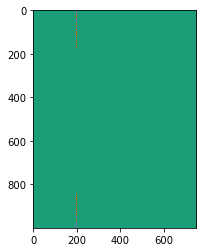

In [101]:
plt.imshow(np.abs(azimuthCompressedSig),cmap = 'Dark2')

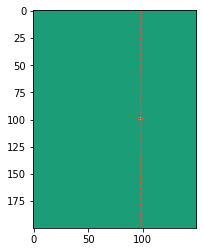

In [102]:
plt.imshow(np.abs(azimuthCompressedSig[400:600,100:250]),cmap = 'Dark2')